# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Dataset

In [2]:
df = pd.read_csv('uber_dataset.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


# Handle Missing Values

In [4]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'key'], axis=1)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert the 'pickup_datetime' column to datetime objects
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Feature Engineering

In [5]:
# Extract date and time features
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year

# We can now drop the original datetime column
df = df.drop('pickup_datetime', axis=1)

# Display the first few rows with the new features
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,dayofweek,month,year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,3,5,2015
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,4,7,2009
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,0,8,2009
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,4,6,2009
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,3,8,2014


In [6]:
from math import radians, sin, cos, sqrt, asin

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers.
    return c * r

# Apply the function to the dataframe
df['distance'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

# Display the first few rows with the new distance column
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,dayofweek,month,year,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,3,5,2015,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,4,7,2009,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,0,8,2009,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,4,6,2009,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,3,8,2014,4.475450


# Exploratory Data Analysis

In [7]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,dayofweek,month,year,distance
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,13.491387,15.704739,3.048435,6.281791,2011.742434,20.855350
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,6.515505,8.687377,1.946946,3.438933,1.856400,382.964642
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,0.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,1.000000,3.000000,2010.000000,1.215222
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,3.000000,6.000000,2012.000000,2.120992
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,23.000000,5.000000,9.000000,2013.000000,3.875169
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,6.000000,12.000000,2015.000000,16409.239135


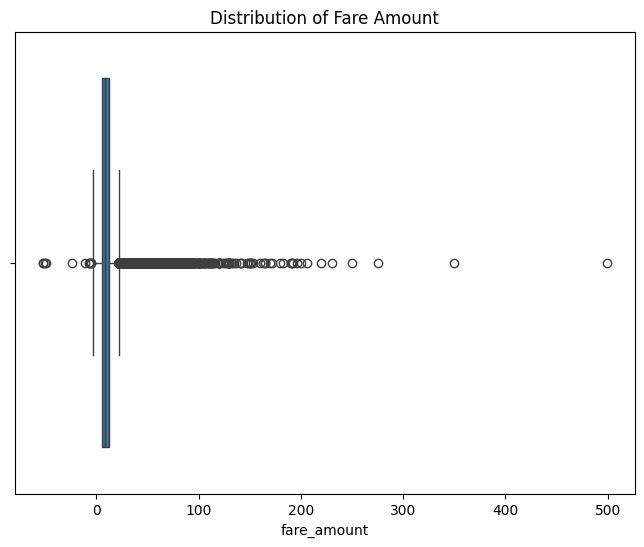

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['fare_amount'])
plt.title('Distribution of Fare Amount')
plt.show()

## Insights-
- Data Skew: The fare_amount is heavily skewed by extreme outliers.
- Data Errors: The presence of negative fares clearly indicates data quality issues.

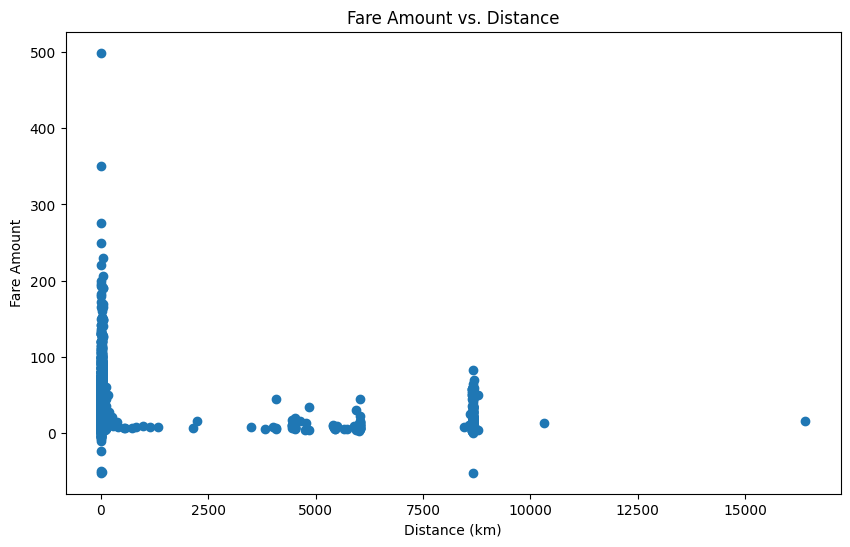

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['distance'], df['fare_amount'])
plt.title('Fare Amount vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount')
plt.show()

## Insights-
- Positive Trend: A weak positive correlation is visible (higher distance generally means a higher fare).
- Cancellation/Error Fares: A significant number of trips have distance = 0 but a positive fare.
- Extreme Outliers: The plot is dominated by impossible data points, such as trips with thousands of kilometers in distance.

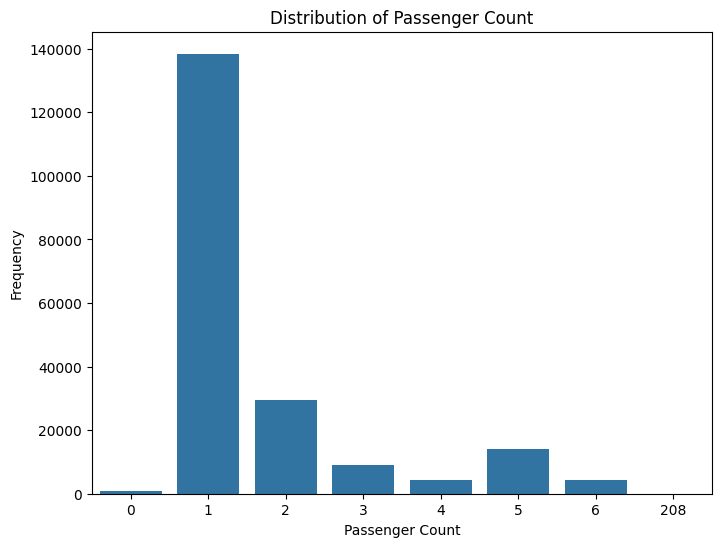

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='passenger_count', data=df)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

## Insights-
- Solo Riders Dominate: The vast majority of trips are for a single passenger.
- Data Errors Confirmed: The plot clearly shows impossible values, like trips with 0 passengers and even a trip with over 200 passengers, which confirms the need for cleaning.
- Typical Capacity: Most rides fall within the expected 1-6 passenger range.

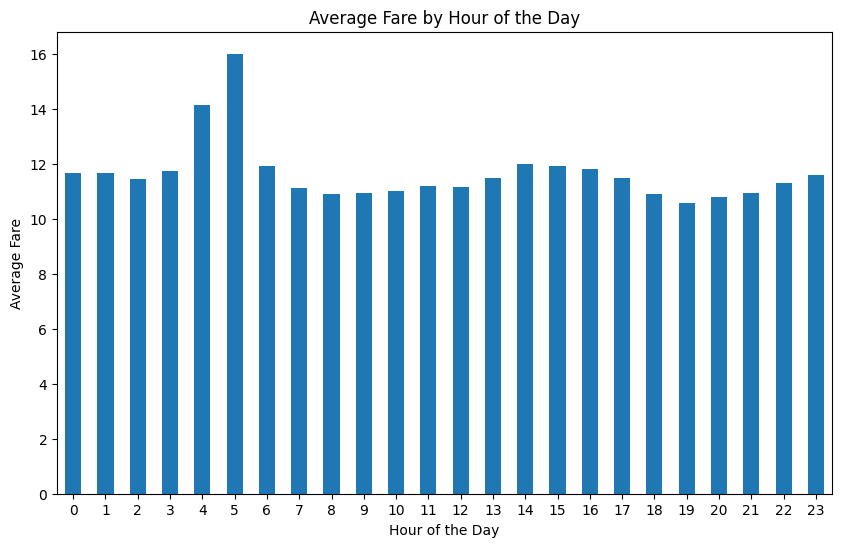

In [11]:
# Create a new DataFrame to group by hour and calculate the mean fare
hourly_fares = df.groupby('hour')['fare_amount'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
hourly_fares.plot(kind='bar')
plt.title('Average Fare by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

## Insights-
- Early Morning Peak: Surprisingly, the highest average fares occur in the early morning, with a sharp peak around 5 AM.
- Evening Rise: There is a secondary, smaller rise in fares during the evening hours, but it does not surpass the 5 AM peak.
- Potential "Why": This is a fascinating and counter-intuitive finding! One innovative hypothesis could be that 5 AM trips are often longer-distance airport runs, which would pull the average fare up significantly. In contrast, evening trips might be more frequent but shorter, resulting in a lower average.

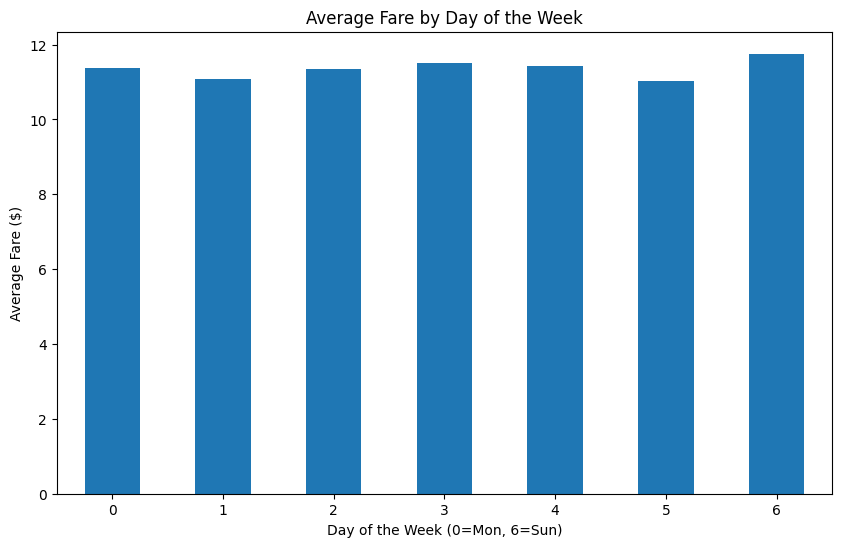

In [12]:
# Group by day of the week and calculate the mean fare
dayofweek_fares = df.groupby('dayofweek')['fare_amount'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
dayofweek_fares.plot(kind='bar')
plt.title('Average Fare by Day of the Week')
plt.xlabel('Day of the Week (0=Mon, 6=Sun)')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=0)
plt.show()

## Insights-
- Fare Stability: Average fares are surprisingly consistent throughout the week, with no dramatic spikes or dips.
- Less Impactful Feature: Compared to the hour of the day, the day of the week appears to have a much weaker influence on the taxi fare.

# Data Cleaning

- Coordinate Clustering: A statistical summary (.describe()) of the latitude and longitude columns shows that the mean coordinates (latitude ≈ 40.7, longitude ≈ -74) are centered directly on NYC.
- Outlier Removal: The primary goal of this filtering is not to exclude other cities but to efficiently remove impossible coordinate values that are clearly data errors.

In [13]:
# --- Step 1: Clean the Data by Removing Outliers ---
# Filter based on fare amount, distance, and passenger count
df = df[df['fare_amount'] > 0]
df = df[(df['distance'] > 0) & (df['distance'] < 100)]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

# Filter based on a reasonable geographic box for NYC
df = df[(df['pickup_latitude'] >= 40.5) & (df['pickup_latitude'] <= 40.9)]
df = df[(df['pickup_longitude'] >= -74.25) & (df['pickup_longitude'] <= -73.7)]
df = df[(df['dropoff_latitude'] >= 40.5) & (df['dropoff_latitude'] <= 40.9)]
df = df[(df['dropoff_longitude'] >= -74.25) & (df['dropoff_longitude'] <= -73.7)]

# --- Step 2: Drop Redundant Columns ---
df = df.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)


# --- Step 3: Check the Shape of Our Cleaned Data ---
print(f"Shape of the dataset after cleaning: {df.shape}")
df.head()

Shape of the dataset after cleaning: (192820, 8)


,fare_amount,passenger_count,hour,day,dayofweek,month,year,distance
0,7.5,1,19,7,3,5,2015,1.683323
1,7.7,1,20,17,4,7,2009,2.457590
2,12.9,1,21,24,0,8,2009,5.036377
3,5.3,3,8,26,4,6,2009,1.661683
4,16.0,5,17,28,3,8,2014,4.475450


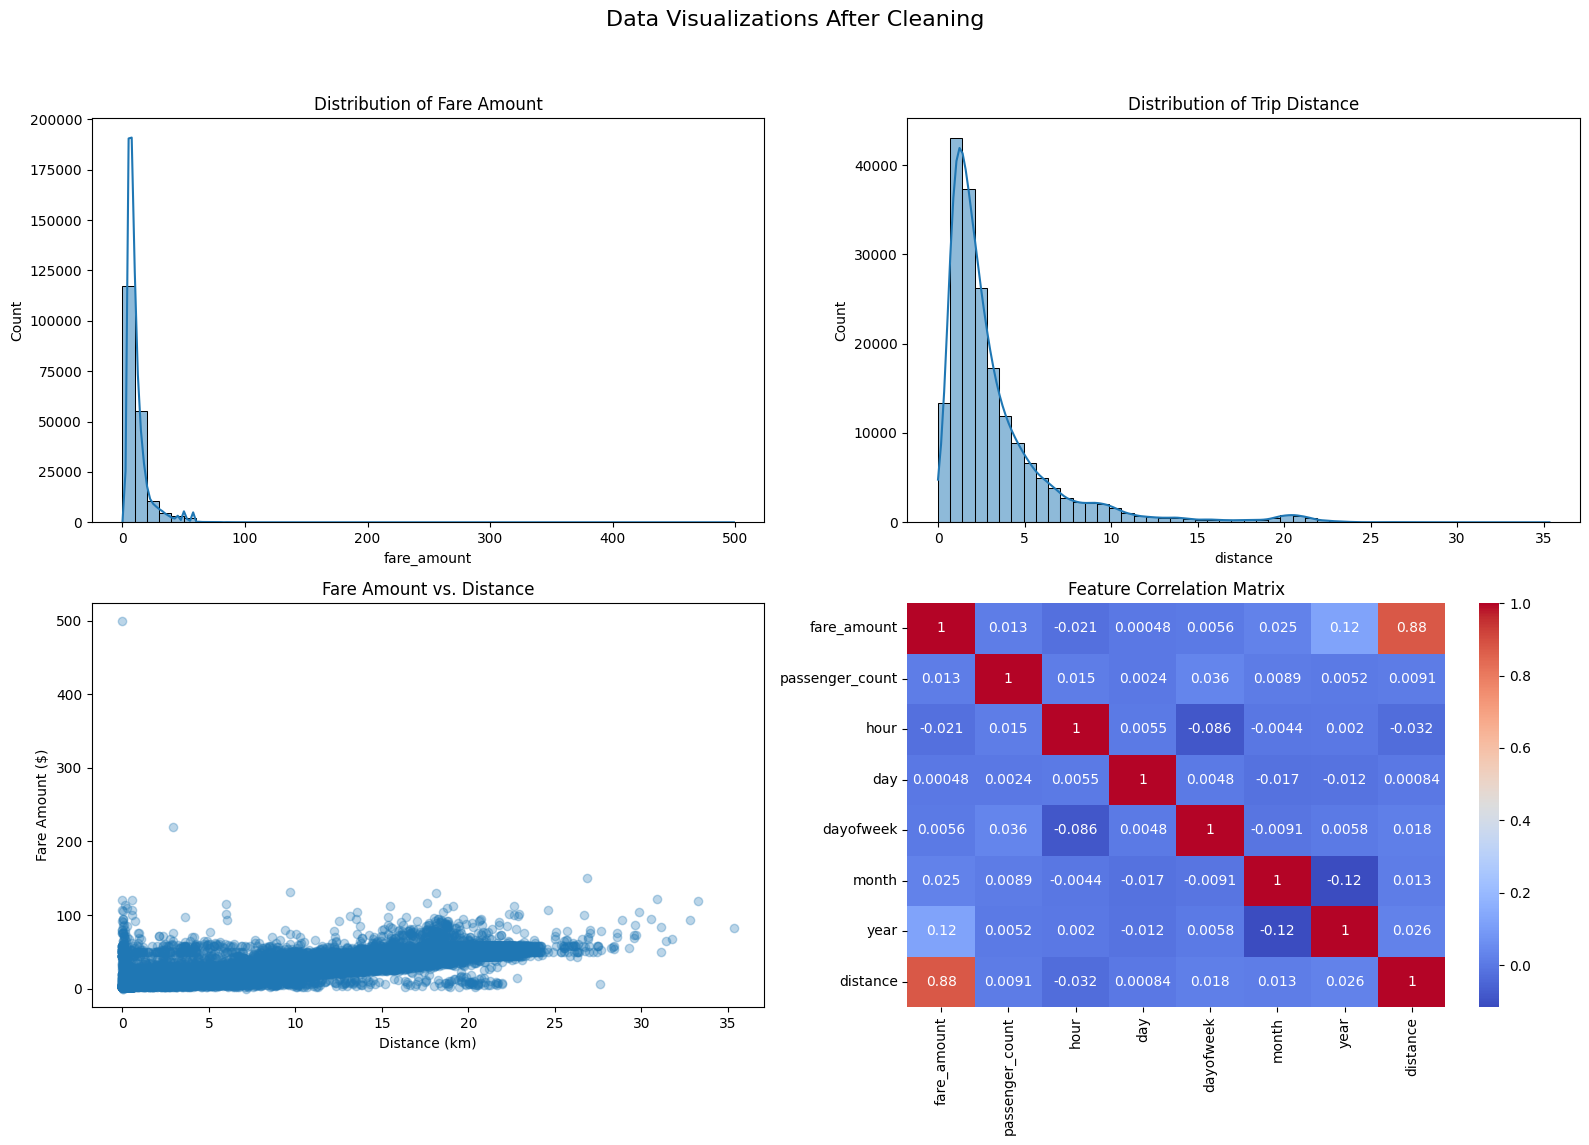

In [14]:
# Set up the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Data Visualizations After Cleaning', fontsize=16)

# 1. Fare Amount Distribution (Histogram)
sns.histplot(df['fare_amount'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Fare Amount')

# 2. Distance Distribution (Histogram)
sns.histplot(df['distance'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Trip Distance')

# 3. Fare Amount vs. Distance (Scatter Plot)
axes[1, 0].scatter(df['distance'], df['fare_amount'], alpha=0.3)
axes[1, 0].set_title('Fare Amount vs. Distance')
axes[1, 0].set_xlabel('Distance (km)')
axes[1, 0].set_ylabel('Fare Amount ($)')

# 4. Correlation Heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation Matrix')

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Insights-
1.Fare & Distance Distributions (Top Row)
- Right-Skewed Distributions: Both fare_amount and distance show a "right-skewed" distribution.
- Focus on Shorter Trips: Most trips are short-distance (under 10 km) and cost less. This makes perfect sense for city taxi rides.

2.Fare vs. Distance Scatter Plot (Bottom Left)
- Clear Linear Trend: The plot now shows a strong, clear, positive linear relationship. As distance increases, the fare amount predictably increases.
- Consistent Pricing: The points form a relatively tight band, indicating consistent fare logic in the data.

3.Correlation Heatmap (Bottom Right)
- Distance has the highest correlation with fare_amount (a score of 0.88), confirming it is by far the most important predictor.


# Splitting the Dataset

In [15]:
# Define our features (X) and target (y)
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the new dataframes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (154256, 7)
X_test shape: (38564, 7)
y_train shape: (154256,)
y_test shape: (38564,)


# Feature Scaling

In [16]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

Our data is now fully pre-processed and ready for the main event: training our machine learning model!

# Model Training

**1. Linear Regression**

In [17]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model object
lr_model = LinearRegression()

# Train the model on our scaled training data
lr_model.fit(X_train_scaled, y_train)

print("Linear Regression model training complete!")

Linear Regression model training complete!


In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate the evaluation metrics
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Print the results
print(f"--- Linear Regression Performance ---")
print(f"R-squared (R²): {r2_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")

--- Linear Regression Performance ---
R-squared (R²): 0.7921
Mean Absolute Error (MAE): 2.25
Root Mean Squared Error (RMSE): 4.38


**2. Random Forest**

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model object
# n_estimators=100 means it will build 100 decision trees
# random_state=42 ensures we get the same result every time
# n_jobs=-1 allows the model to use all available CPU cores for faster training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train_scaled, y_train)

print("Random Forest model training complete!")

Random Forest model training complete!


In [20]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate the evaluation metrics
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Print the results
print(f"--- Random Forest Performance ---")
print(f"R-squared (R²): {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")

--- Random Forest Performance ---
R-squared (R²): 0.7911
Mean Absolute Error (MAE): 2.15
Root Mean Squared Error (RMSE): 4.39


## Interpreting the Random Forest Performance-
When we compare our two models so far:
- R-squared (R²): The Random Forest (0.7911) is almost identical to the Linear Regression (0.7921).
- Mean Absolute Error (MAE): The Random Forest (2.15) is slightly better than the Linear Regression (2.25).
- Root Mean Squared Error (RMSE): Both models have virtually the same RMSE.

## Key Insight-
This tells us that the relationship in our data is so strongly linear (driven by distance) that the extra complexity of the Random Forest model didn't provide a significant benefit. Its average error is a little smaller, but its overall explanatory power is the same.

**3. XGBoost**

In [21]:
import xgboost as xgb

# Create an XGBoost Regressor model object
# n_estimators=100 is the number of boosting rounds
# random_state=42 ensures we get the same result every time
xg_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xg_model.fit(X_train_scaled, y_train)

print("XGBoost model training complete!")

XGBoost model training complete!


In [22]:
# Make predictions on the test data
y_pred_xg = xg_model.predict(X_test_scaled)

# Calculate the evaluation metrics
r2_xg = r2_score(y_test, y_pred_xg)
mae_xg = mean_absolute_error(y_test, y_pred_xg)
rmse_xg = np.sqrt(mean_squared_error(y_test, y_pred_xg))

# Print the results
print(f"--- XGBoost Performance ---")
print(f"R-squared (R²): {r2_xg:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xg:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xg:.2f}")

--- XGBoost Performance ---
R-squared (R²): 0.8009
Mean Absolute Error (MAE): 2.04
Root Mean Squared Error (RMSE): 4.28


### Hyperparameter Tuning

In [23]:
from sklearn.model_selection import RandomizedSearchCV

# These are some of the most important XGBoost parameters
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Create the RandomizedSearchCV object
# n_iter=25 means it will try 25 different combinations of settings
# cv=3 means it will use 3-fold cross-validation
xg_model = xgb.XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=xg_model,
    param_distributions=param_grid,
    n_iter=25,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Start the tuning process
print("Starting hyperparameter tuning...")
random_search.fit(X_train_scaled, y_train)

# Print the best settings found
print("\nBest Hyperparameters Found:")
print(random_search.best_params_)

Starting hyperparameter tuning...
Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best Hyperparameters Found:
{'subsample': 0.9, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.9}


### Optimized Model

In [24]:
# Create a new XGBoost model with the best hyperparameters
final_xg_model = xgb.XGBRegressor(
    subsample=0.9,
    n_estimators=100,
    max_depth=7,
    learning_rate=0.05,
    colsample_bytree=0.9,
    random_state=42
)

# Train the final model
final_xg_model.fit(X_train_scaled, y_train)
print("Final tuned XGBoost model training complete!")

# --- Evaluate the Final Model ---
y_pred_final = final_xg_model.predict(X_test_scaled)
r2_final = r2_score(y_test, y_pred_final)
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))

# --- Print the Final Performance ---
print(f"\n--- Final Tuned XGBoost Performance ---")
print(f"Final R-squared (R²): {r2_final:.4f}")
print(f"Final Mean Absolute Error (MAE): {mae_final:.2f}")
print(f"Final Root Mean Squared Error (RMSE): {rmse_final:.2f}")

Final tuned XGBoost model training complete!

--- Final Tuned XGBoost Performance ---
Final R-squared (R²): 0.8188
Final Mean Absolute Error (MAE): 2.01
Final Root Mean Squared Error (RMSE): 4.09


## Insights-
- We began with a simple Linear Regression model. This gave us a solid baseline performance (R² of ~79%) and proved that a strong linear relationship existed in the data.
-  Interestingly, the more complex Random Forest model did not perform better than the simple Linear Regression. This was a key finding: the primary relationship in our data was so linear (fare vs. distance) that the extra complexity didn't add value.
- Our initial XGBoost model outperformed the others right away. This confirms why boosting algorithms are often the go-to choice for structured, tabular datasets like this one.
- Hyperparameter tuning was the final step that squeezed extra performance out of our best model. It took our R-squared from 80.1% to 81.9%, proving that optimizing a model's internal settings is a critical step for maximizing accuracy.

## Model Evaluation

In [25]:
# Create a dictionary with the model performance data
data = {
    'Model': [
        'Linear Regression',
        'Random Forest Regressor',
        'XGBoost Regressor (Untuned)',
        'XGBoost Regressor (Tuned)'
    ],
    'R-squared (R²)': [0.7921, 0.7911, 0.8009, 0.8188],
    'Mean Absolute Error (MAE)': [2.25, 2.15, 2.04, 2.01],
    'Root Mean Squared Error (RMSE)': [4.38, 4.39, 4.28, 4.09]
}

# Create a pandas DataFrame
performance_df = pd.DataFrame(data)

# Set the 'Model' column as the index for better readability
performance_df.set_index('Model', inplace=True)

performance_df

,R-squared (R²),Mean Absolute Error (MAE),Root Mean Squared Error (RMSE)
Model,,,
Linear Regression,0.7921,2.25,4.38
Random Forest Regressor,0.7911,2.15,4.39
XGBoost Regressor (Untuned),0.8009,2.04,4.28
XGBoost Regressor (Tuned),0.8188,2.01,4.09


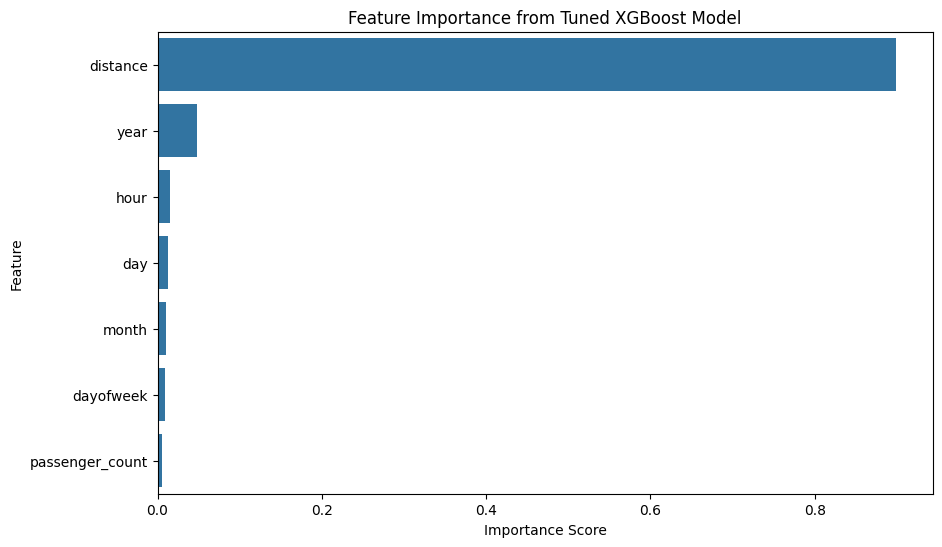

In [26]:
# Get the feature names from the original dataframe columns (excluding the target)
feature_names = X.columns

# Get the importance scores from the trained model
importances = final_xg_model.feature_importances_

# Create a pandas DataFrame for easier plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Tuned XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## Insights-
- Distance is paramount: The single most important factor in determining a taxi fare is the distance of the trip.
- Time matters: When a trip is taken (year, hour, day) is the second most significant factor, reflecting fare inflation over time and dynamic pricing like surges.
- Passengers are irrelevant: The number of passengers has almost no impact on the fare, as the model learned that price is based on the journey, not the occupants.

## Predictions on New Data

In [27]:
# 1. Create a DataFrame for the new data
new_data = pd.DataFrame({
    'passenger_count': [1],
    'hour': [19],
    'day': [4],
    'dayofweek': [3], # Thursday
    'month': [9],
    'year': [2025],
    'distance': [5.5]
})

print("New trip data:")
print(new_data)

# 2. Scale the new data using the SAME scaler we used for training
new_data_scaled = scaler.transform(new_data)

# 3. Make a prediction with our final model
predicted_fare = final_xg_model.predict(new_data_scaled)

# 4. Print the result
print(f"\nPredicted fare for the new trip is: {predicted_fare[0]:.2f}")

New trip data:
   passenger_count  hour  day  dayofweek  month  year  distance
0                1    19    4          3      9  2025       5.5

Predicted fare for the new trip is: 18.52


### Key Benefits and Use Cases-
- For Riders: Provides upfront fare estimates, eliminating surprises and allowing for better budget planning before booking a ride.
- For the Company: Powers dynamic (surge) pricing to balance supply and demand, and helps forecast travel hotspots to allocate drivers efficiently.
- For Drivers: Allows them to maximize earnings by moving to areas where fares are predicted to be high, optimizing their work schedule.

## Recommendations-
- **Implement Granular Pricing Tiers:** Our model shows that the hour and year are highly significant predictors. Use this insight to refine surge pricing during peak hours and implement scheduled annual fare reviews to keep pace with inflation.

- **Create Data-Driven Driver Incentives:** Use the model's ability to predict high-fare periods to offer targeted bonuses. Encourage drivers to be in high-demand zones by showing them "heat maps" based on the model's predictions, reducing wait times and maximizing ride completions.

- **Simplify the Customer Experience:** The model proved that passenger_count has a negligible impact on the fare. Use this to simplify the fare structure and marketing, promoting a single price for 1-4 passengers to reduce confusion and enhance transparency.